In [1]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../datasets/exams.csv")

This is a dataset that contains categorical values, and we'll see how we can convert these to numeric form so that we can use them to train our machine learning model.

This is a very simple toy dataset 

The original source for this dataset is roycekimmons.com and it contains information about different students. You can see that some of this information is personal. We know the gender of the student, the race or ethnicity he or she belongs to, the parental level of education, whether the student has standard or subsidized lunch, and whether the student has joined a test preparation course.

In [3]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
13,female,group D,bachelor's degree,standard,none,69,71,72
3,female,group B,some college,free/reduced,completed,44,52,54
91,male,group D,some high school,standard,none,70,58,57
88,female,group B,some high school,free/reduced,completed,53,69,65
34,male,group C,high school,standard,none,80,67,69


You can see that these personal details are categorical, or discrete values. They're not numeric either, they're represented as string values in our dataset. We also have a few features describing the scores for that student in math, reading, as well as writing. All of these scores are out of a hundred. These are the only numeric features in our dataset with continuous values. 

This dataset has a total of 100 records for 100 students.

In [4]:
data.shape

(100, 8)

In [5]:
data.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


You can see the average scores for these students in math, reading, and writing. You can see that math scores are a little lower than their reading and writing scores. The standard deviation of these scores, how these scores vary across students, is also different. This dataset is interesting because the data needs a lot of preprocessing before we can feed it into a linear model.

We're going to import preprocessing and use the preprocessing.scale function to standardize all of the scores in our dataset. Standardizing a dataset means that these column values will now have 0 mean and unit variance. We'll have a variance of 1. Standardizing values is extremely useful because it gives you an easy way to compare values which are part of different distributions. Standardization is also a common preprocessing technique for machine learning algorithms to build more robust models. We call preprocessing.scale to standardize the math score, reading score, and writing score of all of our students. 

In [6]:
from sklearn import preprocessing

In [7]:
data['math score']    = preprocessing.scale(data['math score'].astype('float64'))
data['reading score'] = preprocessing.scale(data['reading score'].astype('float64'))
data['writing score'] = preprocessing.scale(data['writing score'].astype('float64'))

Standardization is done by subtracting the mean, or average, value of a column of values from each value in that column and dividing the number by the standard deviation of the column. If you sample your data frame now with the standardized values for the different scores, you can see that the scores are now very small numbers. 

In [8]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
5,female,group B,some college,free/reduced,none,-1.075674,-1.315885,-1.022132
37,female,group D,associate's degree,free/reduced,none,-0.625601,-0.876769,-0.482036
15,male,group C,master's degree,standard,completed,1.174690,0.660138,1.070741
53,female,group B,associate's degree,standard,none,1.238986,1.538371,0.868205
25,female,group C,some high school,standard,completed,-2.425892,-2.340490,-1.764765


Negative scores are those which are below the mean, and positive scores are those that are above the mean. Standardizing a dataset allows you to see this at a single glance. You don't need to know the actual numbers, actual mean values, nothing. You can see that the first student with index  18 has been doing pretty poorly in her exams. All of her scores are more than one standard deviation below the mean. 

Let's call describe on our data frame once again. 

In [9]:
data.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.642331e-16,-3.048950e-16,-4.468648e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


Our data frame now contains standardized values for scores. You can see that mean values are very, very close to 0, and the standard deviations for all three scores are very, very close to 1. This is what standardization has done.

# Label Encoding and One-hot Encoding Categorical Data

What's interesting about this dataset is the fact that many of its columns contain discrete or categorical values, such as the parental level of education column. Call the unique function in order to see the unique values represented in this column. 

In [10]:
data['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

These are the differing levels of education for the parents of these students. 

For this particular field containing categorical data, you know that there is an intrinsic order in the level of education. Some high school, then comes high school, then some college, then associate's, the bachelor's, then master's degree. 

In [11]:
parental_level_of_education = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

Categorical values have to be converted to numeric form before they can be used in your ML model, and when there is an ordering associated with your categories, you should use the preprocessing.LabelEncoder object in scikit-learn to convert categorical values to ordered integer values to use in our ML algorithm. 

Instantiate the LabelEncoder object, and call fit on the parent_level_of_education array. The result will be an ordered label encoding of these categories. Every category will be represented by an integer value. And these integers can then be fed into our ML model for training. 

In [12]:
label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(parental_level_of_education)

Label_encoding.classes_ gives you the classes that were encoded as integers. These are the various levels of education for the parents of students. 

In [13]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

Let's transform our parental level of education column in our data frame to these unique integer labels by calling label_encoding.transform. 

In [14]:
data['parental level of education'] = \
    label_encoding.transform(data['parental level of education']).astype(str)

Our parental level of education column will now contain integer values representing the different levels of education. 

Zero represents some high school, 1 represents high school, and so on. 

In [15]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
58,female,group B,2,free/reduced,none,-1.847227,-1.535443,-2.102325
77,female,group D,4,standard,none,0.145952,0.147836,0.530645
87,female,group C,4,free/reduced,none,0.210248,0.221022,0.530645
90,female,group E,3,standard,none,0.081656,-0.071722,-0.009452
46,female,group B,2,free/reduced,none,-1.011378,-0.803583,-0.347012


If you have values in your dataset that are categorical in that they are discrete values, but there is no intrinsic ordering between these values, you can convert these categorical values to numeric representation using one-hot encoding. 

For example, the race or ethnicity that a particular student belongs to is just a category. There is no ordering between these races. The pd.get_dummies function will allow us to represent these categories for students in numeric form using one-hot encoding. 

The pd.get_dummies function will allow us to represent these categories for students in numeric form using one-hot encoding. The pd.get_dummies function will replace the original race/ethnicity column with a column representing each race.

In [16]:
data = pd.get_dummies(data,columns = ['race/ethnicity'])

data.sample(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
30,male,4,standard,completed,0.660321,0.221022,0.260597,0,0,1,0,0
57,female,3,standard,none,-1.204266,-0.218094,-0.347012,0,0,0,1,0
46,female,2,free/reduced,none,-1.011378,-0.803583,-0.347012,0,1,0,0,0
92,male,0,free/reduced,none,-0.947082,-0.949955,-1.022132,0,1,0,0,0
85,female,1,standard,completed,0.338840,0.586952,0.800693,0,1,0,0,0


Race and ethnicity are represented by categories group A, group B, all the way up to group E. And you can see that there is a column associated with each of these groups after we've one-hot encoded this information. 

A student who belongs to group E will have a 1 in that particular column, all other columns will be 0s. A student belonging to group B will have a 1 in that column, other columns will be 0s. This is how one-hot encoding of categorical data works. 

We'll now perform the same one-hot encoding for other categorical values in this dataset. 

In [17]:
data = pd.get_dummies(data, columns = ['gender',
                     'lunch','test preparation course'])

In [18]:
data.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0


Now that we have our data all in numeric form, including the categorical values, let's set up our training data and our test data. We'll try and predict the math score for a particular student using the other features in the dataset. So we'll use the personal details for every student, along with their reading and writing scores to predict their math scores.

The x variables, or the features that we'll use for training, are all columns other than the math score. So drop the math score and assign the rest to x. The y variables are the target values that we're going to predict using linear regression is the math score for every student. Call the train_test_split function in order to use 80% of the data to train our model and 20% to test our model. 

In [20]:
X = data.drop(columns = 'math score')
Y = data['math score']

In [21]:
RANDOM_SEED = 2

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = RANDOM_SEED)

This is a toy dataset. Our training data has just 80 records, and our test data has 20 records. And the corresponding thing is true for the y labels for the values as well.

In [22]:
x_train.shape,x_test.shape

((80, 14), (20, 14))

In [23]:
y_train.shape,y_test.shape

((80,), (20,))

With our dataset all set up, we are now ready to fit a linear model on our data. From sklearn.linear_model, import a LinearRegression estimator. Instantiate the LinearRegression estimator object, and we explicitly pass in the parameter fit_intercept is equal to True. 

Now we've used one-hot encoding for the features in our dataset, and we have set fit_intercept to True, now this particular setup might cause us to encounter what is known as the dummy variable trap. The dummy variable trap occurs when there is perfect collinearity between two variables that we've used in our model. This trap is encountered if we fit an intercept on our linear model and we use all of the columns from our one-hot encoded variables. 

Let's try training our model with these particular parameters, fit_intercept=True and one-hot encoding with all of the columns intact in our features, and see what happens. 

In [25]:
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)

The model trains with no errors, things seem to be fine here. 

Let's calculate the score of this model. 

In [26]:
print("Training Score : ",linear_model.score(x_train,y_train))

Training Score :  0.8902705019605598


Here is the R square, and the R square is 89%. This is very good. It's a simple dataset, which is why we have this high R squared. Let's use this model for prediction on our test data. 

Call linear_model.predict on x_test, and let's calculate the testing R square score as well.

In [27]:
y_pred = linear_model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score

print("Testing Score : ",r2_score(y_test,y_pred))

Training Score :  0.8468838538126181


And the testing score is 84%. Once again, quite good. 

Let's now run the same model, the linear regression model, on the same data. This time we'll set fit_intercept to False. When we've used all of the columns in our one-hot encoded labels, fit_intercept should be False. Once the training of this model is complete, calculate the training score. 

In [29]:
linear_model_2 = LinearRegression(fit_intercept=False).fit(x_train,y_train)

In [30]:
print("Training Score : ",linear_model_2.score(x_train,y_train))

Training Score :  0.8902705019605598


You'll see that it's once again 89.02 %, the same as before. Use this model for prediction and calculate the test R square on the test data as well. 

In [31]:
y_predd = linear_model.predict(x_test)

In [32]:
print("Testing Score : ",r2_score(y_test,y_predd))

Testing Score :  0.8468838538126181


Once again, it's 84%. Now, if you've been following along closely, you might have realized that our training as well as test R squares with fit_intercept=True, as well as False, are exactly the same. Why is this?


So when we previously had set fit_intercept to True, we said that we might encounter the dummy variable trap. But that is clearly not the case. With fit_intercept=False, we get the same results as with fit_intercept=True. This dummy variable trap is often encountered in the real world, which is why the scikit-learn LinearRegressor estimator object accounts for this intercept when you use one-hot encoding in your features. 

So whether you set fit_intercept to True or False, it does not matter with the LinearRegression estimator object. If you've used one-hot encoding for your features, the LinearRegression object will make sure that fit_intercept is False under the hood so that you don't fall into the dummy variable trap. 

So this is a good thing when you're using scikit-learn's LinearRegression object. Not all of the estimator objects in scikit-learn account for this though, so you have to watch out and be a little careful. 

Now that we have predicted values from our model, let's set up a data frame with the actual versus predicted values and take a look at some actual predictions. 

In [34]:
actual_pred_df = pd.DataFrame({'predicted':y_pred,'actual':y_test})

actual_pred_df.head(10)

,predicted,actual
83,-0.125495,0.403137
30,0.594900,0.660321
56,0.875424,1.496170
24,-0.501258,-0.046936
16,-0.684805,-0.754193
23,-2.421335,-3.133149
2,0.929042,0.531729
27,0.644491,0.724617
28,0.694844,0.210248
13,-0.248360,0.145952


Because we standardized the scores when we fed them into our model, the output scores are also in the standardized form. The actual and the predicted scores seem to be pretty close. The high R square should tell us that this is a good model. 


Let's plot line charts of actual versus predicted scores. 

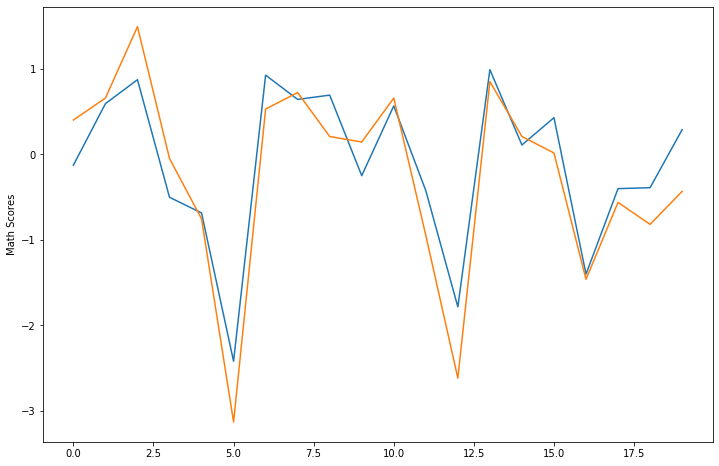

In [35]:
fig , ax = plt.subplots(figsize=(12,8))


plt.plot(y_pred,label = "Predicted")
plt.plot(y_test.values,label = "Actual") # note the use of y_test.values

plt.ylabel("Math Scores")

plt.show()

You can see that they're very close together. Let's try building this model with a few different features. 

Let's try predicting the math score for each student without using any of the other scores. 

The only thing that we change here are our x variables. 

Drop the math score, writing score, and reading score from x.

We'll only use the student's personal details to predict his or her math score. Split up the data into training and test, instantiate and train a linear regression model, calculate the R square score for training, as well as test data. 

In [38]:
X = data.drop(columns = ['math score','writing score','reading score'])
Y = data['math score']

RANDOM_SEED = 2

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = RANDOM_SEED)

linear_model_3 = LinearRegression(fit_intercept=True).fit(x_train,y_train)

print("Training Score : ",linear_model_3.score(x_train,y_train))

y_pred_3 = linear_model_3.predict(x_test)

print("Testing Score  : ",r2_score(y_test,y_pred_3))

Training Score :  0.35689853779017344
Testing Score  :  0.1544849458209937


And you can see that for this particular model our R-square values are really low. That's because it is the other scores that have higher predictive power for the math scores. 

Let's try this once again with a little variation. We'll try and predict the math score using only the reading score along with other features. We won't use the writing score. So reading score alone. Drop the math score and the writing score from our x variables, and go ahead, split up the data, train the model, and print out the R squares. 

In [39]:
X = data.drop(columns = ['math score','writing score'])
Y = data['math score']

RANDOM_SEED = 2

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = RANDOM_SEED)

linear_model_3 = LinearRegression(fit_intercept=True).fit(x_train,y_train)

print("Training Score : ",linear_model_3.score(x_train,y_train))

y_pred_3 = linear_model_3.predict(x_test)

print("Testing Score  : ",r2_score(y_test,y_pred_3))

Training Score :  0.8359528125294313
Testing Score  :  0.8090242833552915


And you can see that on this simple toy dataset, our R square values for training, as well as test, are pretty high when we use just the reading scores along with other features to predict the math score for a student.

In [40]:
# END